# AnastrisTNG 简单介绍

In [1]:
from AnastrisTNG import TNGsimulation  #导入模块
import numpy as np
from AnastrisTNG import TNGtools

In [2]:
import matplotlib.pyplot as plt

In [3]:
run = 'TNG50'
BasePath = '/home/dumin/IllustrisTNG/' + run + '-1/output/'         #模拟数据所在位置
snap=99                                                             #需要分析的快照序号

In [4]:
Snapshot=TNGsimulation.Snapshot(BasePath,snap)                     #初始化Snapshot

In [5]:
Snapshot

<Snapshot "TNG50-1_snapshot99" len=0>

In [6]:
print(Snapshot)                  #也可以使用print 输出基本信息

<Snapshot "TNG50-1_snapshot99" len=0>


In [7]:
Snapshot.properties               #Simdict，字典，保存所有关于该snapshort的信息

{'a': 0.9999999999999998,
 'h': 0.6774,
 'omegaM0': 0.3089,
 'omegaL0': 0.6911,
 'omegaB0': 0.0486,
 'sigma8': 0.8159,
 'ns': 0.9667,
 'boxsize': SimArray(1., '3.50e+04 a kpc h**-1'),
 'Halos_total': 10247012,
 'Subhalos_total': 5688113,
 'filedir': '/home/dumin/IllustrisTNG/TNG50-1/output/',
 'run': 'TNG50-1',
 'Snapshot': 99,
 'eps': SimArray(0.195, 'kpc h**-1'),
 'Mdm': SimArray(3.1e-05, '1.00e+10 Msol h**-1'),
 'baseunits': [Unit("kpc"), Unit("km s**-1"), Unit("Msol")]}

a为尺度因子；h，omegaM0，omegaL0，omegaB0，sigma8，ns 为模拟所用的宇宙学参数；boxsize为模拟盒子的大小；Halos_total 为该snapshot中halo的总数；Subhalos_total 为subhalo的总数；filedir 为文件所在位置；run 为具体什么模拟； Snapshot 为snapshot序号；eps 为引力软化尺度；Mdm 为单个暗物质粒子质量；baseunits 当转化为基本物理单位后 采用的单位制。

In [8]:
Snapshot.cosmology           #直接获取宇宙学参数

{'h': 0.6774,
 'omegaM0': 0.3089,
 'omegaL0': 0.6911,
 'omegaB0': 0.0486,
 'sigma8': 0.8159,
 'ns': 0.9667}

In [9]:
Snapshot.boxsize              #获取boxsize

SimArray(1., '3.50e+04 a kpc h**-1')

In [10]:
print('尺度因子:',Snapshot.a)
print('宇宙时间:',Snapshot.t)
print('回顾时间:',Snapshot.tLB)
print('红移:',Snapshot.z)             

尺度因子: 0.9999999999999998
宇宙时间: 1.38e+01 Gyr
回顾时间: 6.13e-15 Gyr
红移: 2.220446049250313e-16


In [11]:
Snapshot.rho_crit       #当前时刻的宇宙学临界密度

Unit("5.48e+02 km**2 G**-1 Mpc**-2 s**-2")

### 载入粒子

In [12]:
Snapshot.load_particle_para       #字典，查看导入粒子的 设置，

{'particle_field': 'dm,star,gas,bh',
 'Basefields': ['Coordinates', 'Velocities', 'Masses', 'ParticleIDs'],
 'star_fields': [],
 'gas_fields': [],
 'dm_fields': [],
 'bh_fields': []}

particle_field 为载入粒子类型，一共这四种类型：暗物质粒子，恒星粒子，气体粒子，黑洞粒子。默认四个都载入。\
Basefields 为基本属性，即所有类型粒子都需导入的属性。\
star_fields，gas_fields... 为特定类型粒子的特殊属性。\
关于 粒子属性 更详细介绍 查看； https://www.tng-project.org/data/docs/specifications/#sec1b

In [13]:
Snapshot.load_particle_para['star_fields']=[
    'GFM_StellarFormationTime','GFM_StellarPhotometrics','BirthPos']   #设置 额外导入恒星粒子 的GFM_StellarFormationTime
Snapshot.load_particle_para['gas_fields']=['GFM_Metals','ElectronAbundance','InternalEnergy','Density'] #

In [14]:
Snapshot.load_particle_para          

{'particle_field': 'dm,star,gas,bh',
 'Basefields': ['Coordinates', 'Velocities', 'Masses', 'ParticleIDs'],
 'star_fields': ['GFM_StellarFormationTime',
  'GFM_StellarPhotometrics',
  'BirthPos'],
 'gas_fields': ['GFM_Metals',
  'ElectronAbundance',
  'InternalEnergy',
  'Density'],
 'dm_fields': [],
 'bh_fields': []}

In [15]:
Snapshot.load_halo(400)   #导入该snapshot下id为400的halo
# 使用Snapshot.load_subhalo() 导入subhalo，在未改变坐标前，可以多次载入粒子，改变坐标或计算引力后，载入粒子功能被锁定，不能再载入粒子

In [16]:
Snapshot.s.keys()

['y',
 'HaloID',
 'x',
 'pos',
 'vel',
 'iord',
 'BirthPos_x',
 'z',
 'BirthPos_y',
 'aform',
 'vy',
 'mass',
 'vx',
 'BirthPos_z',
 'SubhaloID',
 'BirthPos',
 'GFM_StellarPhotometrics',
 'vz']

In [17]:
Snapshot.load_subhalo(549516)

In [18]:
Snapshot.subhalos[549516].PT.s

<SimSnap "TNG50-1_snapshot99:Subhalo_549516::star" len=691113>

In [19]:
TNGsimulation.galaxy_evolution(Snapshot.properties['filedir'],99,549516,)

TypeError: galaxy_evolution() missing 1 required positional argument: 'fields'

In [19]:
Traceparticle=TNGtools.findtracer_MP(Snapshot.properties['filedir'],99,Snapshot.subhalos['549516'].PT.s['iord'],8)

In [34]:
Traceparticle.keys()

dict_keys(['ParentID', 'TracerID'])

In [36]:
len(Traceparticle['TracerID'])

0

In [29]:
Snapshot.s.keys()

['vz',
 'iord',
 'BirthPos',
 'BirthPos_z',
 'vx',
 'BirthPos_x',
 'SubhaloID',
 'vy',
 'y',
 'vel',
 'BirthPos_y',
 'GFM_StellarPhotometrics',
 'mass',
 'HaloID',
 'pos',
 'aform',
 'z',
 'x']

In [28]:
TNGsimulation.merger_history(Snapshot.properties['filedir'],99,549516,minMassRatio=0.05)

{'MergerEvents': array([0., 0., 0., 0., 2., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'MassRatio': [0.059816267,
  0.27163708,
  0.056858767,
  0.077828266,
  0.057605054,
  0.11141318,
  0.26114193,
  0.36686462],
 'First-SubfindID': [417390,
  349714,
  322231,
  220656,
  148595,
  74020,
  90742,
  90742],
 'Next-SubfindID': [417413,
  349716,
  322241,
  220657,
  148622,
  74025,
  90743,
  90744],
 'First-SubhaloMassType': [SimArray([4.8493447e+00, 4.1487816e+01, 0.0000000e+00, 0.0000000e+00,
            1.5131317e+00, 3.2421246e-03], dtype=float32, '1.00e+10 Msol h**-1'),
  array([4.8493447e+00, 4.148781

In [24]:
Snapshot.properties

{'a': 0.9999999999999998,
 'h': 0.6774,
 'omegaM0': 0.3089,
 'omegaL0': 0.6911,
 'omegaB0': 0.0486,
 'sigma8': 0.8159,
 'ns': 0.9667,
 'boxsize': SimArray(1., '3.50e+04 a kpc h**-1'),
 'Halos_total': 10247012,
 'Subhalos_total': 5688113,
 'filedir': '/home/dumin/IllustrisTNG/TNG50-1/output/',
 'run': 'TNG50-1',
 'Snapshot': 99,
 'eps': SimArray(0.195, 'kpc h**-1'),
 'Mdm': SimArray(3.1e-05, '1.00e+10 Msol h**-1'),
 'baseunits': [Unit("kpc"), Unit("km s**-1"), Unit("Msol")]}

In [17]:
Snapshot.g.keys()

['z',
 'vx',
 'mass',
 'rho',
 'x',
 'HaloID',
 'GFM_Metals',
 'vel',
 'y',
 'pos',
 'ElectronAbundance',
 'SubhaloID',
 'vz',
 'u',
 'vy',
 'iord']

In [18]:
Snapshot['SubhaloID']        #粒子所属的SubhaloID，没有激活subhalo

SimArray([-1, -1, -1, ..., -1, -1, -1], dtype=int32)

In [19]:
Snapshot['HaloID']        #HaloID 已有

SimArray([400, 400, 400, ..., 400, 400, 400], dtype=int32)

In [20]:
Snapshot.load_GC()    #导入group cata

In [20]:
Snapshot.GC_loaded_Halo  # 该halo 已导入group catalo

array([400])

In [21]:
Snapshot.center(mode='ssc')   # 中心坐标  默认 方法使用 shrink sphere center  

SimArray([ 6260.91732938, 24152.90859663, 18309.46831678], 'a kpc h**-1')

In [22]:
Snapshot.center(mode='com')  #质心

SimArray([ 6260.50863816, 24153.73984727, 18311.79302046], 'a kpc h**-1')

In [23]:
Snapshot.halos[400].GC['GroupCM']   # group catalog 给的质心坐标

SimArray([ 6260.51 , 24153.738, 18311.791], dtype=float32, 'a kpc h**-1')

In [24]:
Snapshot.halos[400].GC['GroupPos']   # group catalog 给的 引力势最低点

SimArray([ 6260.937, 24152.902, 18309.434], dtype=float32, 'a kpc h**-1')

In [25]:
Snapshot.PT_loaded_Subhalo   #已导入粒子的subhalo  ，可以直接唤醒，并给粒子分配subhaloID
# Snapshot.subhalos[Snapshot.PT_loaded_Subhalo]   此方法为所有已经载入粒子的Subhalo匹配粒子  10^6 ~ 20s 
# 该halo中的第一个编号subhalo 即为中心星系

array([590792, 590793, 590794, 590795, 590796, 590797, 590798, 590799,
       590800, 590801, 590802, 590803, 590804, 590805, 590806, 590807,
       590808, 590809, 590810, 590811, 590812, 590813, 590814, 590815,
       590816, 590817, 590818, 590819, 590820, 590821, 590822, 590823,
       590824, 590825, 590826, 590827, 590828, 590829, 590830, 590831,
       590832, 590833, 590834, 590835, 590836, 590837, 590838, 590839,
       590840, 590841, 590842, 590843, 590844, 590845, 590846, 590847,
       590848, 590849, 590850, 590851, 590852, 590853, 590854, 590855,
       590856, 590857, 590858, 590859, 590860, 590861, 590862, 590863,
       590864, 590865, 590866, 590867, 590868, 590869, 590870, 590871,
       590872, 590873, 590874, 590875, 590876, 590877, 590878, 590879,
       590880, 590881, 590882, 590883, 590884, 590885, 590886, 590887,
       590888, 590889, 590890, 590891, 590892, 590893, 590894, 590895,
       590896, 590897, 590898, 590899, 590900, 590901, 590902, 590903,
      

In [26]:
Snapshot.subhalos[590792]   #激活

<Subhalo "TNG50-1_snapshot99" SubhaloID=590792>

In [30]:
TNGsimulation.Merger_History(Snapshot.properties['filedir'],Snapshot.snapshot,590792,
                             minMassRatio=0.25)

{'MergerEvents': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'MassRatio': [1.9488572],
 'First-SubfindID': [209266],
 'Next-SubfindID': [209263],
 'First-SubhaloMassType': [array([0.01058924, 0.03795991, 0.        , 0.        , 0.01200393,
         0.        ], dtype=float32)],
 'Next-SubhaloMassType': [array([2.0311556e+00, 1.4347003e+01, 0.0000000e+00, 0.0000000e+00,
         1.1977242e-01, 1.6775182e-04], dtype=float32)],
 'First-SnapNum': [30],
 'Next-SnapNum': [30],
 'numMergers': 1}

In [27]:
Snapshot.subhalos[590792].face_on()   # 选择中心星系作为face_on  #计算0.1Rvir内的粒子

In [28]:
Snapshot.subhalos[590792].center()    #该星系坐标已移动到0，0，0

SimArray([-6.88306820e-05, -2.84561364e-04, -1.72166393e-04], 'a kpc h**-1')

In [29]:
Snapshot.subhalos[590792].vel_center()    #该星系中心速度坐标也已移到中心

SimArray([ 0.02802341, -0.00034505,  0.0064916 ], 'km a**1/2 s**-1')

In [30]:
Snapshot.subhalos[590792].PT       #粒子 ParticleType 

<SimSnap "TNG50-1_snapshot99:Subhalo_590792" len=1946830>

In [31]:
Snapshot.subhalos[590792].PT.s  #.s恒星 ,.g气体，.bh黑洞，.dm暗物质

<SimSnap "TNG50-1_snapshot99:Subhalo_590792::star" len=473395>

In [32]:
Snapshot.dm

<SimSnap "TNG50-1_snapshot99::dm" len=1094154>

In [33]:
Snapshot.subhalos[590792].PT['phi']         
#查看引力势，需要计算 约1min，为所有该Snapshot已载入的粒子进行计算，只有唤起时才计算，一些用到引力势的方法也会自动计算，如使用引力势最低点计算中心坐标

There is no phi in the keyword
Calculating gravity and it will take tens of seconds
Calculate by using Octree


SimArray([-166104.91245962, -166171.57893112, -164889.33108655, ...,
           -19375.36347248,  -15958.76814695, -165327.28851614], 'km**2 s**-2')

In [34]:
Snapshot.subhalos[590792].PT['acc']         #查看引力加速度，为所有该Snapshot已载入的粒子进行计算

There is no acc in the keyword
Calculate by using Octree


SimArray([[ 7338.83777905, -9064.64407156, -2621.98879627],
          [-9310.94555052, 10422.10179974, -4757.23738322],
          [10896.20187405,  4715.88113335, -7660.25504041],
          ...,
          [   66.02853848,   107.71834565,    62.93580502],
          [  -31.98569913,    12.04826684,    88.49426358],
          [-2221.0867234 , -1023.13358432,  -225.489445  ]], 'km s**-1 Gyr**-1')

In [35]:
Snapshot.subhalos[590792].center(mode='pot')     #使用引力势最低点，查看中心坐标，若无phi，该方法会自动计算导入phi

SimArray([-0.00962669, -0.00353289, -0.00416665], 'a kpc h**-1')

In [36]:
Snapshot.physical_units()               #将单位都转化为物理单位

In [37]:
Snapshot.subhalos[590792].PT['pos']

SimArray([[-1.41732380e-01,  8.42482634e-02,  6.39733659e-03],
          [ 7.56151643e-02, -9.80668965e-02,  2.17989638e-02],
          [-2.87344785e-01, -7.64793694e-02,  2.92805144e-02],
          ...,
          [-6.09970048e+01, -9.18271157e+01, -4.71812972e+01],
          [ 5.60181339e+01, -1.08957335e+01, -1.39842455e+02],
          [-1.41226984e-04, -1.04148544e-03, -1.73486458e-04]], 'kpc')

In [38]:
Snapshot.subhalos[590792].PT['phi']

SimArray([-166104.91245962, -166171.57893112, -164889.33108655, ...,
           -19375.36347248,  -15958.76814695, -165327.28851614], 'km**2 s**-2')

In [39]:
Snapshot.subhalos[590792].face_on()       #进行face_on，若存在acc或phi，也同步转换，
# 同时设置该星系 R200~R178,之间的粒子引力势的平均值作为0点 ，中心acc为0

In [40]:
Snapshot.subhalos[590792].PT['phi']

SimArray([-151954.06057601, -152020.72704751, -150738.47920295, ...,
            -5224.51158887,   -1807.91626334, -151176.43663254], 'km**2 s**-2')

In [41]:
Snapshot.subhalos[590792].PT['ke']        #Specific kinetic energy

SimArray([ 591.59867354,  288.88472652,  199.04057814, ..., 7991.88588135,
          1591.8343848 ,    9.33726073], 'km**2 s**-2')

In [42]:
## Snapshot.shift(pos,vel,phi)   也可以此方法调整位置，速度，引力势，坐标

In [43]:
Snapshot.subhalos[590792].R_vir()   #R178 位力半径 ，178倍当前时刻 临界密度

SimArray(177.81262824, 'kpc')

In [44]:
Snapshot.g['temp']            #气体温度，需要载入气体 ElectronAbundance，InternalEnergy。最好还需要GFM_Metals 估计H质量比

SimArray([  66574.58734749,   66122.53720072,   57047.51485598, ...,
          4417925.31382544, 7104209.75795098, 5496673.05653385], 'K')

In [45]:
Snapshot.subhalos[590792].face_on(mode='pot',alignwith='baryon') #alignwith 使用什么类型粒子计算角动量进行face-on。默认值为'all'所有

In [46]:
pr=TNGsimulation.profile(Snapshot.subhalos[590792].PT,ndim=2,nbins=200,rmin=0.5,rmax=50)    #分析径向分布
#ndim =2 为二维   #这里展示一些功能，其它自行探索

Text(0, 0.5, '$\\phi\\ [km^2/s^2]$')

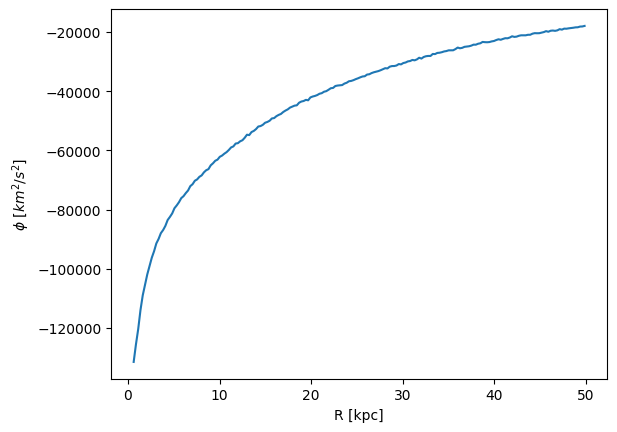

In [47]:
plt.plot(pr['rbins'],pr['phi'])              #引力势分布
plt.xlabel('R [kpc]')
plt.ylabel('$\phi\ [km^2/s^2]$')

Text(0, 0.5, '$V_c$ [km/s]')

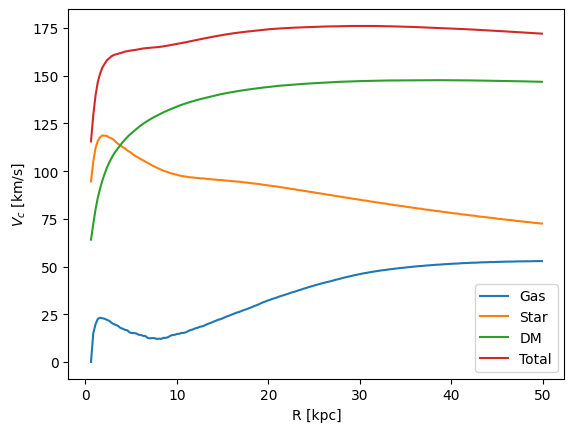

In [48]:
plt.plot(pr['rbins'],pr['v_circ-gas'],label='Gas')        # 关键字 加 '-gas' '-star' '-dm' 即对特定粒子的profile
plt.plot(pr['rbins'],pr['v_circ-star'],label='Star')        #V_circ， 计算盘面上环上八个点的平均加速度得到
plt.plot(pr['rbins'],pr['v_circ-dm'],label='DM')
plt.plot(pr['rbins'],pr['v_circ'],label='Total')
plt.legend()
plt.xlabel('R [kpc]')
plt.ylabel('$V_c$ [km/s]')

/home/lushuai/.local/lib/python3.8/site-packages/pynbody/array.py:353: RuntimeWarning: invalid value encountered in divide
  return np.ndarray.__truediv__(self, rhs)


Text(0, 0.5, 'Q')

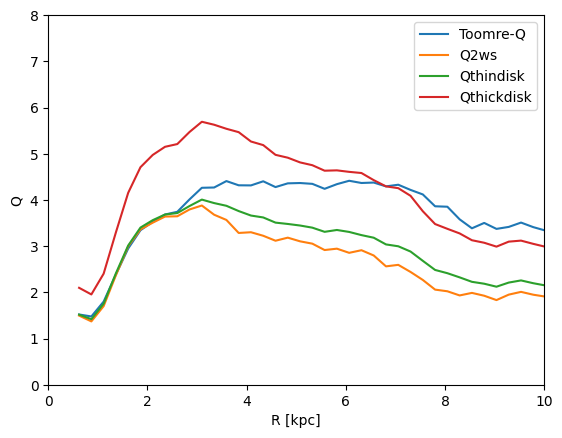

In [49]:
plt.plot(pr['rbins'],pr['Qstar'],label='Toomre-Q')
plt.plot(pr['rbins'],pr['Q2ws'],label='Q2ws')
plt.plot(pr['rbins'],pr['Q2thin'],label='Qthindisk')
plt.plot(pr['rbins'],pr['Q2thick'],label='Qthickdisk')
plt.legend()
plt.xlim(0,10)
plt.ylim(0,8)
plt.xlabel('R [kpc]')
plt.ylabel('Q')

Text(0, 0.5, '$H_\\mathrm{\\alpha}\\ [\\mathrm{erg\\ cm^{-3}\\ s^{-1}\\ sr^{-1}}]$')

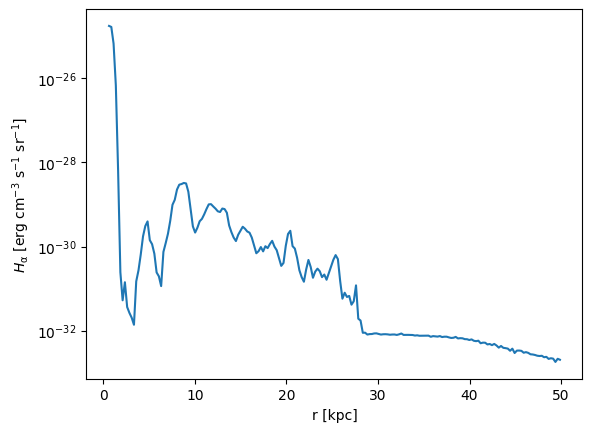

In [50]:
plt.plot(pr['rbins-gas'],pr['Halpha-gas'])
plt.yscale('log')
plt.xlabel('r [kpc]')
plt.ylabel(r'$H_\mathrm{\alpha}\ [\mathrm{erg\ cm^{-3}\ s^{-1}\ sr^{-1}}]$')

Text(0, 0.5, 'Gas temp [K]')

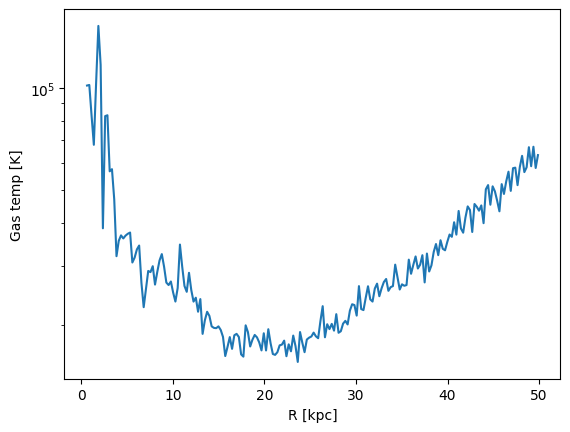

In [51]:
plt.plot(pr['rbins-gas'],pr['temp-gas'])
plt.yscale('log')
plt.xlabel('R [kpc]')
plt.ylabel('Gas temp [K]')

Text(0, 0.5, 'Velocity [km/s]')

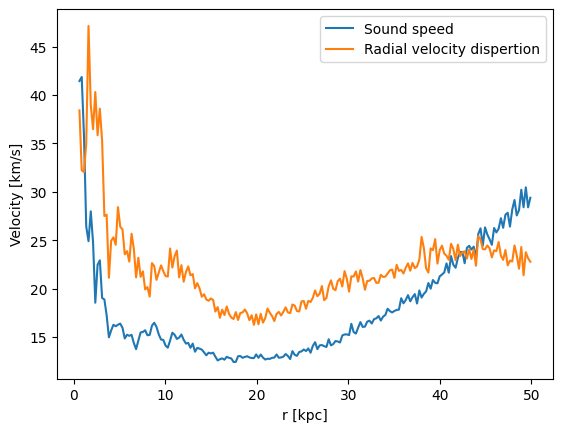

In [52]:
plt.plot(pr['rbins-gas'],pr['cs-gas'],label='Sound speed')
plt.plot(pr['rbins-gas'],pr['vr_disp-gas'],label='Radial velocity dispertion')
plt.legend()
plt.xlabel('r [kpc]')
plt.ylabel('Velocity [km/s]')

In [53]:
Snapshot.PT_loaded_Subhalo

array([590792, 590793, 590794, 590795, 590796, 590797, 590798, 590799,
       590800, 590801, 590802, 590803, 590804, 590805, 590806, 590807,
       590808, 590809, 590810, 590811, 590812, 590813, 590814, 590815,
       590816, 590817, 590818, 590819, 590820, 590821, 590822, 590823,
       590824, 590825, 590826, 590827, 590828, 590829, 590830, 590831,
       590832, 590833, 590834, 590835, 590836, 590837, 590838, 590839,
       590840, 590841, 590842, 590843, 590844, 590845, 590846, 590847,
       590848, 590849, 590850, 590851, 590852, 590853, 590854, 590855,
       590856, 590857, 590858, 590859, 590860, 590861, 590862, 590863,
       590864, 590865, 590866, 590867, 590868, 590869, 590870, 590871,
       590872, 590873, 590874, 590875, 590876, 590877, 590878, 590879,
       590880, 590881, 590882, 590883, 590884, 590885, 590886, 590887,
       590888, 590889, 590890, 590891, 590892, 590893, 590894, 590895,
       590896, 590897, 590898, 590899, 590900, 590901, 590902, 590903,
      

In [54]:
print(Snapshot['SubhaloID'])      #已匹配SubhaloID，此时若为-1 则表明不在任何Subhalo中或未激活
# Snapshot.subhalos[Snapshot.PT_loaded_Subhalo]   使用此语句则全部激活

[590792 590792 590792 ...     -1     -1 590792]


In [55]:
Snapshot.status_loadPT       #这里查看能否继续load粒子，若已经改变了已载入粒子的坐标等，则不能再load粒子

'locked'

In [56]:
Snapshot.subhalos[590793].center()  # 该星系的相对中心星系的坐标

SimArray([188.17655071,  27.75134838,   3.93565106], 'kpc')

In [57]:
Snapshot.subhalos[590793].vel_center()   #相对中心星系的速度

SimArray([-72.11433926,  77.74040754, -37.71859992], 'km s**-1')

## 分析group catalog

In [58]:
Snapshot.status_loadPT

'locked'

In [59]:
#不能载入其它粒子了，但依然可以 载入其它任意halo和subhalo的group catalog

In [60]:
Snapshot.GC_loaded_Subhalo    # 没有subhalo 导入GC

array([], dtype=float64)

In [61]:
Snapshot.load_GC()     #执行此语句将自动为所有激活的 Halo和subhalo 导入

In [62]:
Snapshot.GC_loaded_Subhalo   #因为只激活了两个subhalo 所以只导入了两个

array([590792, 590793])

In [63]:
SubhaloID=np.arange(10000,10500)  # 假如你有一些subahloID

In [65]:
print(SubhaloID[0:10])

[10000 10001 10002 10003 10004 10005 10006 10007 10008 10009]


In [66]:
Snapshot.subhalos[SubhaloID] #放进来进行激活

In [67]:
Snapshot.load_GC()         #再为这些星系载入GC

In [68]:
Snapshot.subhalos[10000].GC   #查看单个星系的 GC ，这是个字典

{'a': 0.9999999999999998,
 'h': 0.6774,
 'omegaM0': 0.3089,
 'omegaL0': 0.6911,
 'omegaB0': 0.0486,
 'sigma8': 0.8159,
 'ns': 0.9667,
 'boxsize': SimArray(51668.14289932, 'kpc'),
 'Halos_total': 10247012,
 'Subhalos_total': 5688113,
 'filedir': '/home/dumin/IllustrisTNG/TNG50-1/output/',
 'run': 'TNG50-1',
 'Snapshot': 99,
 'eps': SimArray(0.28786537, 'kpc'),
 'Mdm': SimArray(457632.12282256, 'Msol'),
 'baseunits': [Unit("kpc"), Unit("km s**-1"), Unit("Msol")],
 'SubhaloID': 10000,
 'SubhaloBHMass': SimArray(0., dtype=float32, '1.00e+10 Msol h**-1'),
 'SubhaloBHMdot': SimArray(0., dtype=float32, '1.02e+10 Msol Gyr**-1'),
 'SubhaloBfldDisk': SimArray(0., dtype=float32, '1.00e+05 km h Msol**1/2 s**-1 kpc**-3/2 a**-2'),
 'SubhaloBfldHalo': SimArray(0., dtype=float32, '1.00e+05 km h Msol**1/2 s**-1 kpc**-3/2 a**-2'),
 'SubhaloCM': SimArray([ 7976.6475, 24587.611 , 21290.11  ], dtype=float32, 'a kpc h**-1'),
 'SubhaloFlag': SimArray(True),
 'SubhaloGasMetalFractions': SimArray([0., 0., 0., 

In [69]:
Snapshot.physical_units()        #一些单位不是物理单位，这里可以再统一转化
# 这里转换时默认为所有PT和GC都转换

In [71]:
print(Snapshot.GC_loaded_Subhalo[0:10])

[10000 10001 10002 10003 10004 10005 10006 10007 10008 10009]


In [73]:
len(Snapshot.GC_loaded_Subhalo)

502

In [74]:
Snapshot.subhalos.GC('SubhaloMassInRad') #查看所有已导入GC的subhalo的某一类属性

SimArray([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00, 8.99680240e+07, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.94610800e+07,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 9.46045680e+07, 0.00000000e+00, 8.90037760e+07,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.71304800e+07,
          0.00000000e+00, 0.00000000e+

In [76]:
Snapshot.s['age'].in_units('Gyr')              # 恒星粒子的年龄

SimArray([11.040419  , 10.443959  ,  9.060371  , ..., -0.19697504,
          -0.19697504, -0.19697504], dtype=float32, 'Gyr')

In [78]:
Snapshot.s['age'].convert_units('Gyr')  # 转化指定单位 用这条命令

In [79]:
Snapshot.s['age']            #小于0的为 wind particle 详情见官网描述

SimArray([11.040419  , 10.443959  ,  9.060371  , ..., -0.19697504,
          -0.19697504, -0.19697504], dtype=float32, 'Gyr')

In [80]:
Snapshot.s['tform']                #形成时间，  为14的，为wind particle

SimArray([ 2.7626069,  3.359066 ,  4.742654 , ..., 14.       , 14.       ,
          14.       ], dtype=float32, 'Gyr')

In [81]:
Snapshot.halos   #已载入激活的所有halo，num=1 意思是只有一个Halo被载入

<Halos "TNG50-1_snapshot99" num=1>

In [82]:
Snapshot.subhalos  #已激活的所有subhalo，num=502。尽管有subhalo被载入了，但没有匹配粒子。

<Subhalos "TNG50-1_snapshot99" num=502>

In [30]:
otherSubhalo=Snapshot.load_particle(30,'Subhalo')             #如果不想载入粒子在该snapshot中，独立载入一个Subhalo

In [83]:
Snapshot.load_particle_para         #这里查看 每个类型粒子 从文件中读取到的参数

{'particle_field': 'dm,star,gas,bh',
 'Basefields': ['Coordinates', 'Velocities', 'Masses', 'ParticleIDs'],
 'star_fields': ['ParticleIDs',
  'Masses',
  'GFM_StellarFormationTime',
  'Velocities',
  'Coordinates'],
 'gas_fields': ['Density',
  'ParticleIDs',
  'Masses',
  'InternalEnergy',
  'GFM_Metals',
  'Velocities',
  'Coordinates',
  'ElectronAbundance'],
 'dm_fields': ['Coordinates', 'Velocities', 'ParticleIDs', 'Masses'],
 'bh_fields': ['Coordinates', 'Velocities', 'Masses', 'ParticleIDs']}